In [17]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

import numpy as np
import torch
from slim import *
from reader import RoutinesDataset, get_cooccurence_frequency
from encoders import TimeEncodingOptions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
time_options = TimeEncodingOptions(None)
data = RoutinesDataset(data_path=('../data/differentBreakfasts0202/routines_train.json', '../data/differentBreakfasts0202/routines_test.json'), 
                        classes_path='../data/differentBreakfasts0202/classes.json', 
                        time_encoder=time_options('external'), 
                        dt=10,
                        test_perc=0.1, 
                        batch_size=10,
                        only_seen_edges = False)

cooccurence_freq = get_cooccurence_frequency(data)

50  routines and  179  examples in train split.
5  routines and  16  examples in test split.


['dining_room', 'knifeblock', 'mat', 'table', 'cupboard', 'kitchen_counter', 'sink', 'kitchen_counter', 'coffe_maker', 'stove', 'fridge', 'bowl', 'chef_knife', 'coffee_filter', 'food_bread', 'food_cereal', 'food_egg', 'fork', 'ground_coffee', 'milk', 'mug', 'plate', 'sauce_pan', 'spoon']


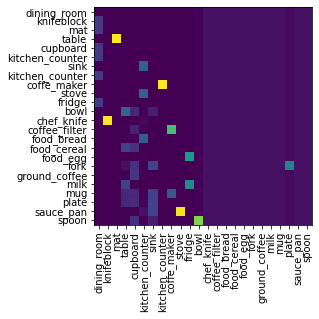

In [19]:
import matplotlib.pyplot as plt
print(data.node_classes)
fig, ax = plt.subplots()
ax.imshow(cooccurence_freq.numpy())

_ = ax.set_xticks(np.arange(len(data.node_classes))) 
plt.xticks(rotation = 90)
_ = ax.set_xticklabels(data.node_classes)


_ = ax.set_yticks(np.arange(len(data.node_classes))) 
_ = ax.set_yticklabels(data.node_classes)

In [21]:
s = Slim(cooccurence_freq)
for (routine, additional_info) in list(data.test_routines):
    print(s.step(data.test_routines.collate_fn([routine[0]])))
    break


tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7912, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0989, 0.0000,
         0.0000, 0.1099, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000